In [1]:
from nilearn import plotting, image
from os import listdir
from os.path import isfile, join
import numpy as np

In [2]:
subject_path = '/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_firstlevel_modelestimate_saveresids_00001/sub-NDARAP912JK3'
# ResI_0001.nii

files = [join(subject_path, f) for f in listdir(subject_path) if isfile(join(subject_path, f)) and f.startswith("ResI")]
print(files[:5])

['/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_firstlevel_modelestimate_saveresids_00001/sub-NDARAP912JK3/ResI_0132.nii', '/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_firstlevel_modelestimate_saveresids_00001/sub-NDARAP912JK3/ResI_0150.nii', '/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_firstlevel_modelestimate_saveresids_00001/sub-NDARAP912JK3/ResI_0627.nii', '/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_firstlevel_modelestimate_saveresids_00001/sub-NDARAP912JK3/ResI_0735.nii', '/imaging3/owenlab/wilson/MovieData/Release8/Age10/BioBank_Analysis_All/aamod_firstlevel_modelestimate_saveresids_00001/sub-NDARAP912JK3/ResI_0548.nii']


In [3]:
concat_file = image.concat_imgs(files)

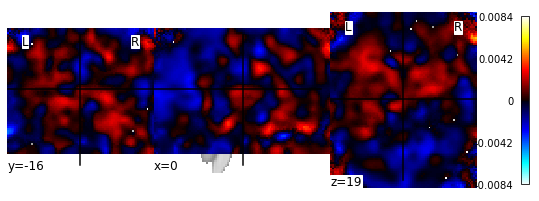

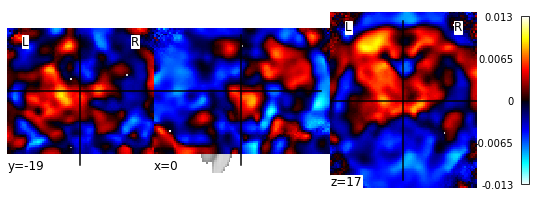

In [4]:
selected_volumes = image.index_img(concat_file, slice(3, 5))

for img in image.iter_img(selected_volumes):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img)


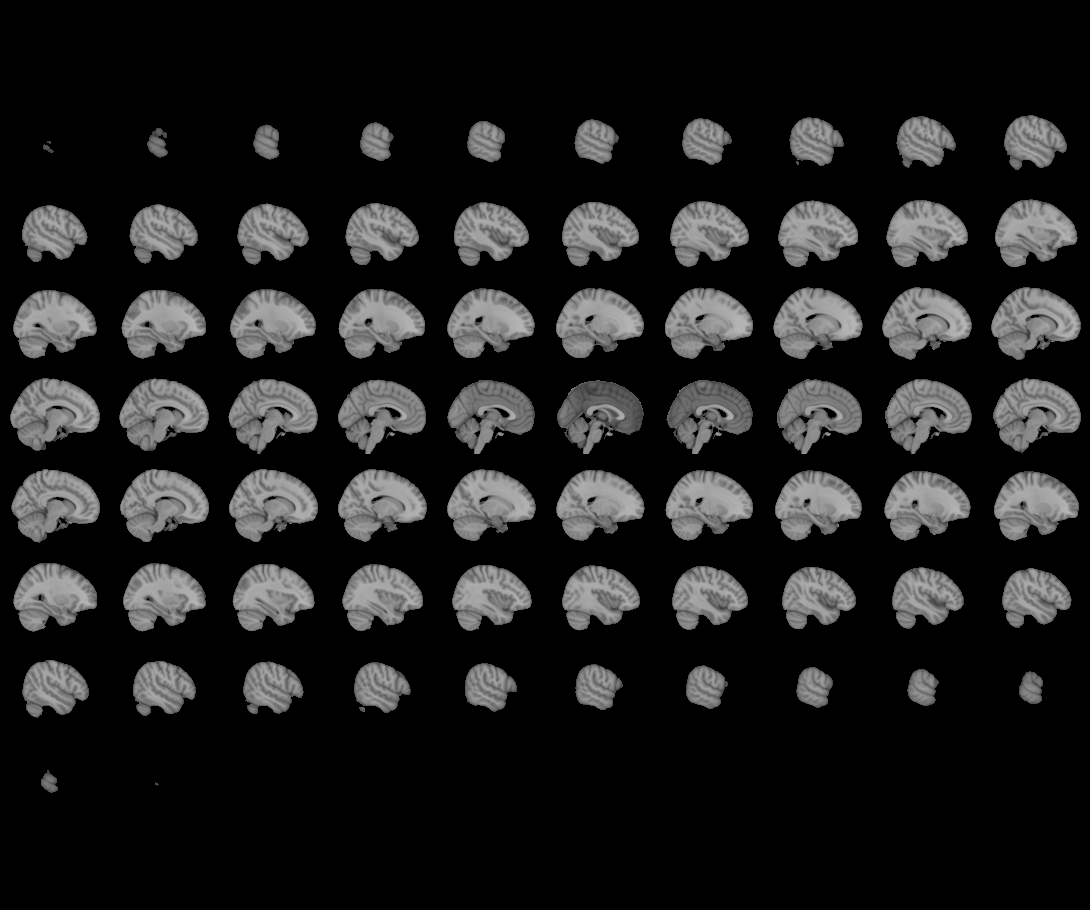
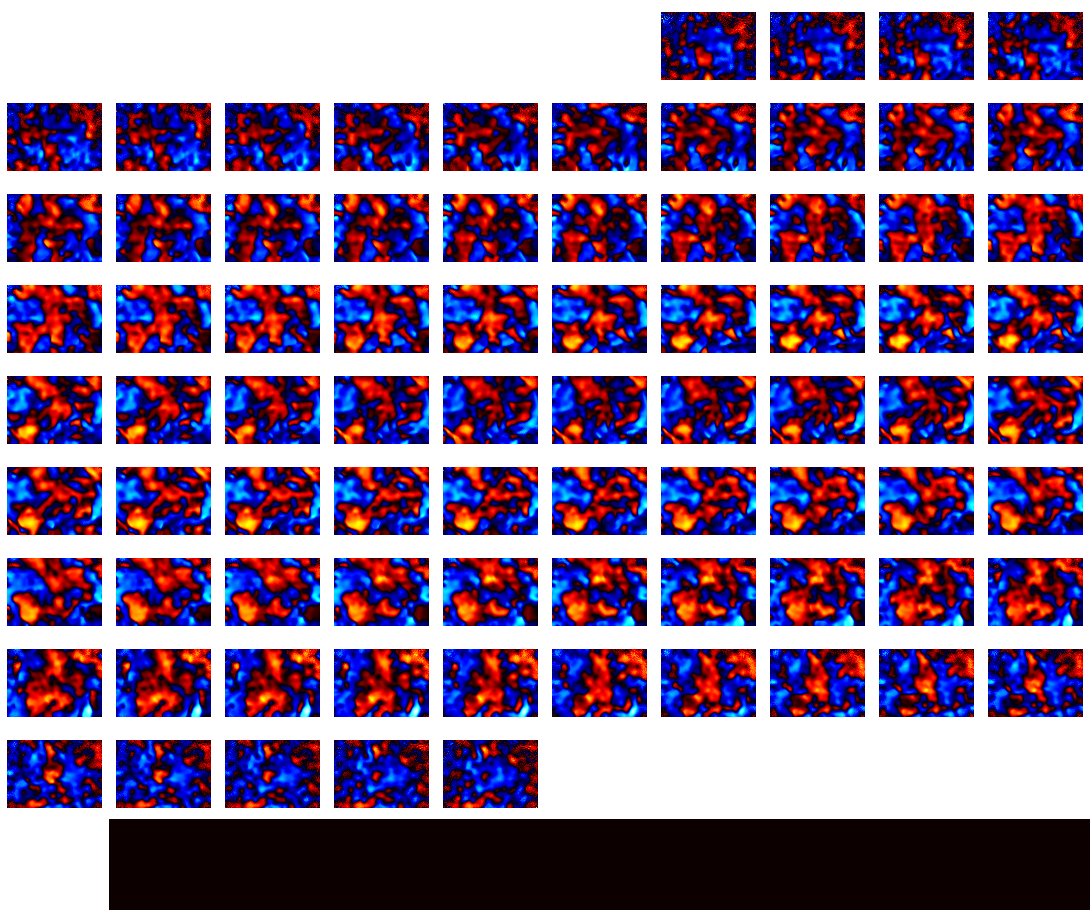

In [5]:
plotting.view_img(image.mean_img(concat_file), threshold=None)

In [9]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

print('Atlas ROIs are located in nifti image (4D) at: %s' %
      atlas_filename)  # 4D data

{'rois': rec.array([(  1, -25, -98, -12), (  2,  27, -97, -13),
           (  3,  24,  32, -18), (  4, -56, -45, -24),
           (  5,   8,  41, -24), (  6, -21, -22, -20),
           (  7,  17, -28, -17), (  8, -37, -29, -26),
           (  9,  65, -24, -19), ( 10,  52, -34, -27),
           ( 11,  55, -31, -17), ( 12,  34,  38, -12),
           ( 13,  -7, -52,  61), ( 14, -14, -18,  40),
           ( 15,   0, -15,  47), ( 16,  10,  -2,  45),
           ( 17,  -7, -21,  65), ( 18,  -7, -33,  72),
           ( 19,  13, -33,  75), ( 20, -54, -23,  43),
           ( 21,  29, -17,  71), ( 22,  10, -46,  73),
           ( 23, -23, -30,  72), ( 24, -40, -19,  54),
           ( 25,  29, -39,  59), ( 26,  50, -20,  42),
           ( 27, -38, -27,  69), ( 28,  20, -29,  60),
           ( 29,  44,  -8,  57), ( 30, -29, -43,  61),
           ( 31,  10, -17,  74), ( 32,  22, -42,  69),
           ( 33, -45, -32,  47), ( 34, -21, -31,  61),
           ( 35, -13, -17,  75), ( 36,  42, -20,  55),
 

AttributeError: labels

In [4]:
from nilearn import datasets
from nilearn.input_data import NiftiSpheresMasker

power = datasets.fetch_coords_power_2011()
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

spheres_masker = NiftiSpheresMasker(
    seeds=coords, smoothing_fwhm=6, radius=5.,
    detrend=True, standardize=True, low_pass=0.1, high_pass=0.01, t_r=2)

time_series = spheres_masker.fit_transform(concat_file)
print('time series has {0} samples'.format(time_series.shape[0]))

NameError: name 'timeseries' is not defined

In [17]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(concat_file)

[NiftiLabelsMasker.fit_transform] loading data from /home/bpho/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f1d29547dd0>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7f1ccb36cc10>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/home/bpho/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs]

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/input_data/nifti_labels_masker.py:313: UserWarning: Persisting input arguments took 3.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  verbose=self.verbose)


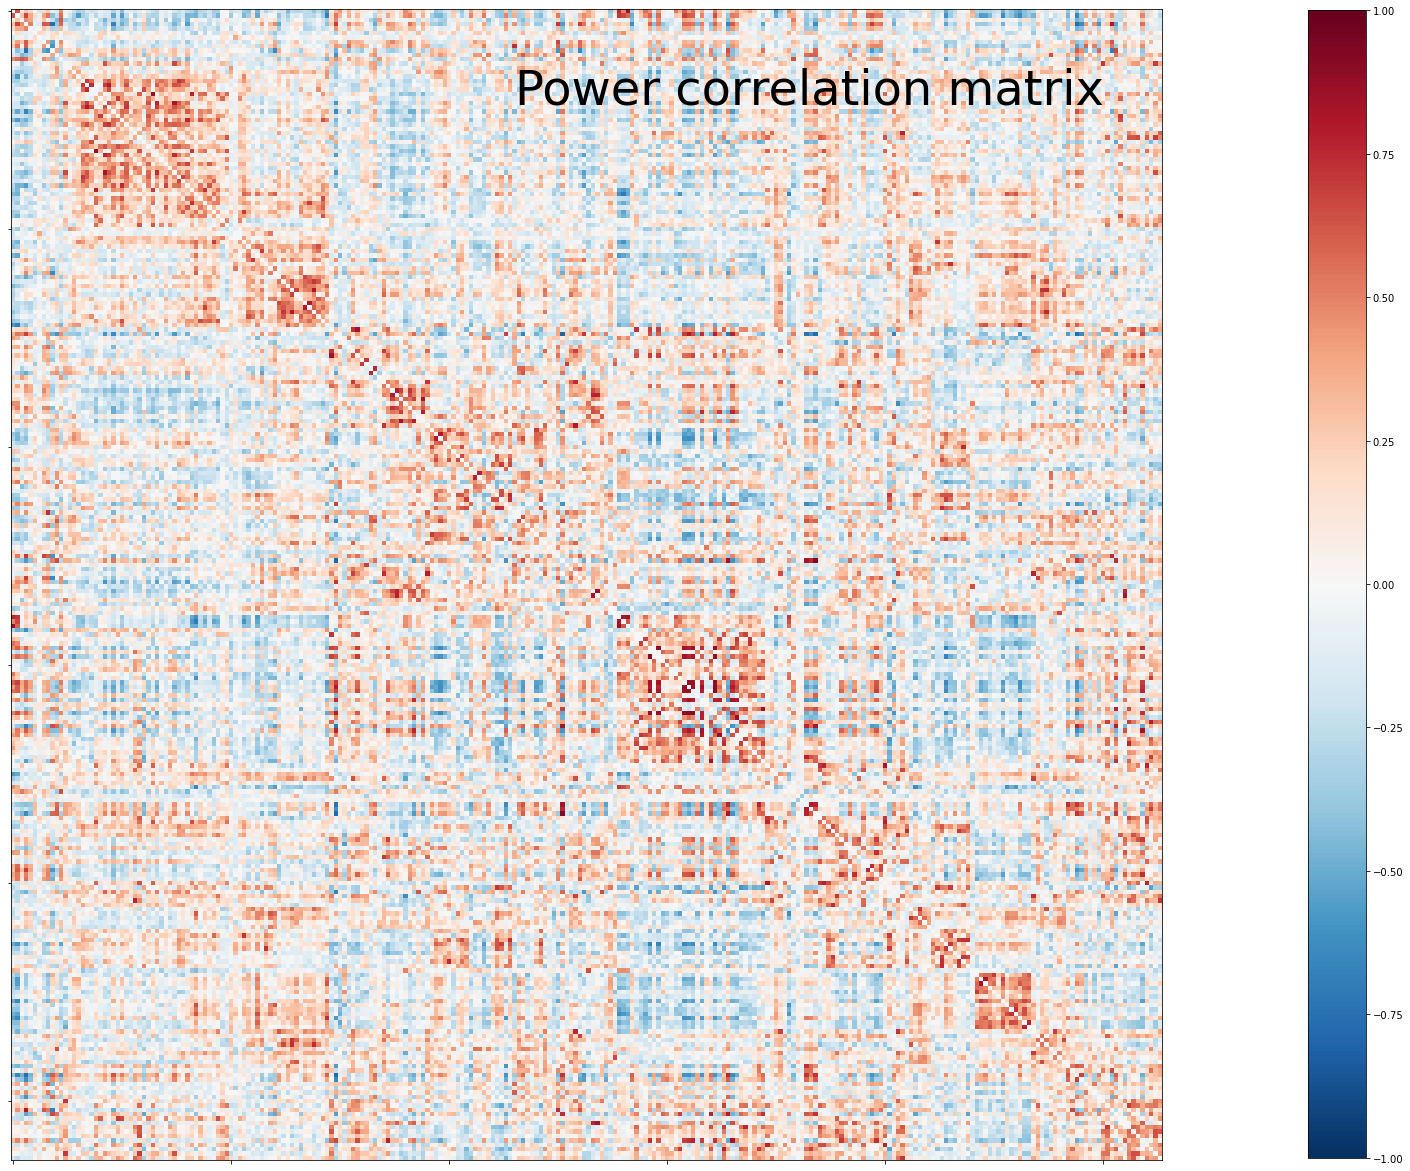

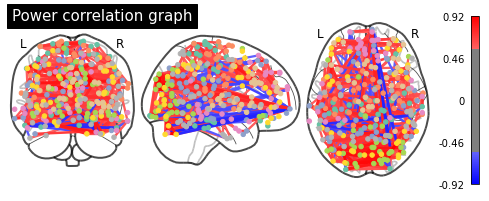

In [12]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
from nilearn import plotting

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
# plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
#                      vmax=0.8, vmin=-0.8, reorder=True)

plotting.plot_matrix(correlation_matrix, vmin=-1., vmax=1., colorbar=True, figure=(20, 20),
                     title='Power correlation matrix')

# Tweak edge_threshold to keep only the strongest connections.
plotting.plot_connectome(correlation_matrix, coords, title='Power correlation graph',
                         edge_threshold='98.0%', node_size=20, colorbar=True)